In [1]:
import tensorflow as tf

/home/black/anaconda3/envs/Tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensor is a n dimensonal matrix

Add_4 node 4 is added of type int32

In [10]:
a = tf.add(2,3)
print (a)

Tensor("Add_4:0", shape=(), dtype=int32)


Session is used to evaluate the graph and run 
used to execute node and all its preceding


In [18]:
%%html
<img src="images/clip.png",width=400,height=400>

In [23]:
## node waits till its arguments are ready and does not care about unrequired calculation.

In [24]:
sess = tf.Session()
print(sess.run(a))
sess.close()
# you can even use with tf.Session as sess:
#                      sess.run()
# run takes the list of node

5


## Above we were using a default graph and adding the node in it. 

## To create your own graph other than default graph

In [31]:
g = tf.Graph()
# look my graph as default graph
with g.as_default(): 
    x = tf.add(3,5)
sess = tf.Session(graph=g)
sess.run(x)
# tf.get_default_graph() to handle default graph

8

In [41]:
a = tf.constant(2,name="a")
b = tf.constant(3,name="b")
x = tf.add(a,b,name="x")
sess.close()
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graph',sess.graph)
    print (sess.run(x))
writer.close()

5


#### e.eval() interactive session

#### tf.zeros(shape,name) tf.ones() tf.zerolike() tf.fill(dims,value)

#### tf.linspace(start,stop,num)
#### tf.range(start,limit,delta)
#### tensor object not iterable
#### tf.random_normal(shape,mean,stddev)
#### tf.truncated_normal(shape,mean,stddev)
#### tf.random_uniform(shape,..)
#### tf.random_shuffle(shape,..)
#### tf.random_crop(..)
#### tf.random_gamma(..)
#### tf.set_random_seed(seed)


In [42]:
%%html
<img src ="images/clip1.png">

# Tensorflow datatype
-  0-dtensor or scaler
-  t_0 = 19
-  tf.zero_like(t_0) ==> 0  zeroness
-  tf.one_like(t_0) ==> 1  oneness
-  tf.int32 = np.int32

# Print out the grapg def
#### print sess.graph.as_graph_def()

# Variable

In [4]:
tf.reset_default_graph()
a = tf.Variable(2,name="scaler")
b = tf.Variable([2,3],name="vector")
c = tf.Variable([[1,2],[3,4]],name="matrix")
w = tf.Variable(tf.zeros([256,256]))

### tf.Variable is class tf.constant is op

- x = tf.Variable(...)
- x.initializer  #init op
- x.value()      # read op
- x.assign_add(...) # and more

In [7]:
#init = tf.global_variables_initializer([a,b],name="var_ab")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

print(a.eval())

In [12]:
a = tf.Variable(2,name="a")
with tf.Session() as sess:
    sess.run(a.initializer)
    print(a.eval()) 

2


In [15]:
a = tf.Variable(10)
b = a.assign(70)
with tf.Session() as sess:
    sess.run(a.initializer)
    sess.run(b)
    print(a.eval())

70


Each session matain its own copy of its variable

In [16]:
#U = tf.Variable(2*W) #error
#U = tf.Variable(2*W.initialed_value()) #error
# with g.control_dependencies([a,b,c]):
    # d,e, will only run after a b c are executed

# Placeholder

- assemble a graph
- Use a session to execute operations in the graph.

a = tf.placeholder(tf.float32,shape=[3])

b = tf.constant([5,5,5],tf.float32)
#### use placeholder as you would a constant or var
c = a + b

now if you print c it will error as a has no value

# Feed value to placeholder

with tf.Session() as sess:
    #feed [1,2,3] to placeholder a via dict {a:[1,2,3]}
    # fetch value of c
    print sess.run(c,{a:[1,2,3]})

with tf.Session() as sess:

    for a_value in list_of_values_for_a:
    
        print sess.run(c,{a:a_value})

In [17]:
# tf.Graph.is_feedble()
# we can feed during run

Epoch 0: 1661.863764550287
Epoch 1: 956.3224439573916
Epoch 2: 844.6737683409139
Epoch 3: 750.7312372197838
Epoch 4: 667.659830722252
Epoch 5: 594.1417484349327
Epoch 6: 529.0787271179651
Epoch 7: 471.5003584364135
Epoch 8: 420.5458252520938
Epoch 9: 375.45531067297253
Epoch 10: 335.55436177954664
Epoch 11: 300.24627770512666
Epoch 12: 269.00374521501146
Epoch 13: 241.3595776562824
Epoch 14: 216.9003910217238
Epoch 15: 195.25972397061292
Epoch 16: 176.1137731664483
Epoch 17: 159.17551683403158
Epoch 18: 144.19069889799545
Epoch 19: 130.93503690609023
Epoch 20: 119.20935661137888
Epoch 21: 108.83793506244884
Epoch 22: 99.66458668207358
Epoch 23: 91.55171666162971
Epoch 24: 84.37658985632197
Epoch 25: 78.03213362396008
Epoch 26: 72.42178616552172
Epoch 27: 67.46132107331957
Epoch 28: 63.07563027821873
Epoch 29: 59.19871881428714
Epoch 30: 55.77163058824279
Epoch 31: 52.742706123048954
Epoch 32: 50.06563247971506
Epoch 33: 47.70006537150391
Epoch 34: 45.61017402416389
Epoch 35: 43.7637948

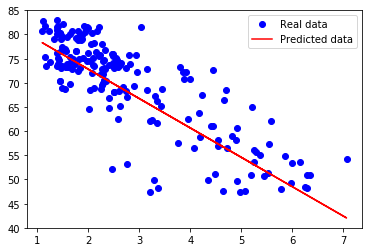

In [2]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

DATA_FILE = 'birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

# Step 4: build model to predict Y
Y_predicted = w * X + b 

# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


start = time.time()
writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	# Step 8: train the model for 100 epochs
	for i in range(100): 
		total_loss = 0
		for x, y in data:
			# Session execute optimizer and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_out, b_out = sess.run([w, b]) 

print('Took: %f seconds' %(time.time() - start))

# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()


In [9]:
import os

import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

import utils

# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('mnist', one_hot=True)
X_batch, Y_batch = mnist.train.next_batch(batch_size)

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.

X = tf.placeholder(tf.float32,[batch_size, 784], name='image') 
Y = tf.placeholder(tf.int32, [batch_size, 10], name='label')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y

w = tf.get_variable(name='weights', shape=(784, 10), initializer=tf.random_normal_initializer())
b = tf.get_variable(name='bias', shape=(1, 10), initializer=tf.zeros_initializer())

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch
# loss = tf.reduce_mean(-tf.reduce_sum(tf.nn.softmax(logits) * tf.log(Y), reduction_indices=[1]))

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

writer = tf.summary.FileWriter('./graphs/logreg_placeholder', tf.get_default_graph())
with tf.Session() as sess:
	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	
	# train the model n_epochs times
	for i in range(n_epochs): 
		total_loss = 0

		for j in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], {X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
	print('Total time: {0} seconds'.format(time.time() - start_time))

	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0

	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		accuracy_batch = sess.run(accuracy, {X: X_batch, Y:Y_batch})
		total_correct_preds += accuracy_batch	

	print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

writer.close()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


ValueError: Variable weights already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-2-e882cec3f434>", line 20, in <module>
    w = tf.get_variable('weights', initializer=tf.constant(0.0))
  File "/home/black/anaconda3/envs/Tf/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/black/anaconda3/envs/Tf/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):


In [3]:
len(X_batch)

NameError: name 'X_batch' is not defined

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import plot_model
from PIL import Image , ImageOps
import numpy as np
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train[0])
# print(len(x_train[0]))
# im = Image.open(x_train[0])
# im.show()
# print('before changing')
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    print("hola")
else:
    print("hola8")
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# print(x_train[0])
# print(len(x_train[0][0][0]))
# print(x_train[0].shape)
# print(np.zeros((3,3,1)))

# im1 = Image.open("b.jpeg").convert('LA')
im1 = Image.open("b.jpeg")
im2=ImageOps.grayscale(im1)
Arr1 = np.array(im1)
Arr2 = np.array(im2)
# print('shape of image is',Arr.shape,' value are ',Arr[0][0])
# Arr.show()
# img = Image.fromarray(Arr)
# img.show()    

print(x_train[0].shape)
# print(x_train[0].type)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')



# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


hola8
(28, 28, 1)


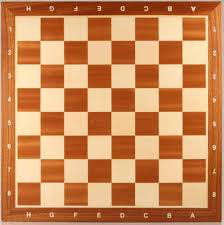

In [4]:
im1

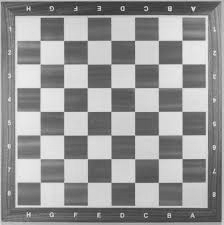

In [5]:
im2

In [6]:
Arr1.shape

(225, 224, 3)

In [7]:
print(Arr2.shape)
print(Arr2)
Arr2.reshape(1,225,224)
# img = Image.fromarray(Arr2)
Arr2

(225, 224)
[[184 191 185 ... 187 184 172]
 [193 163 152 ... 161 181 174]
 [167  98  97 ... 157 183 177]
 ...
 [204 192 182 ... 172 205 198]
 [214 192 181 ... 181 210 202]
 [218 198 183 ... 182 209 204]]


array([[184, 191, 185, ..., 187, 184, 172],
       [193, 163, 152, ..., 161, 181, 174],
       [167,  98,  97, ..., 157, 183, 177],
       ...,
       [204, 192, 182, ..., 172, 205, 198],
       [214, 192, 181, ..., 181, 210, 202],
       [218, 198, 183, ..., 182, 209, 204]], dtype=uint8)

In [8]:
pp= x_train[0].reshape(28,28)

In [9]:
img = Image.fromarray(pp)

In [10]:
img

In [14]:
j=0
for i in x_train:
    if j != 5:
        pp= i.reshape(28,28)
        img = Image.fromarray(pp)
        img.show()
        j = j + 1
    else:
        break

In [15]:
x_train.shape

(60000, 28, 28, 1)